In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

In [2]:
# a)
m1 = np.array([[1, 0],
               [0, -1]])

print('Проверка ортогональности m1:') 
print(m1*m1.T)

# b)
m2 = np.array([[1, 2],
               [0, 1]])

print('Проверка ортогональности m2:') 
print(m2*m2.T)

# c)
m3 = np.array([[1, 0],
               [2, 1]])

print('Проверка ортогональности m3:') 
print(m3*m3.T)

# d)
m4 = np.array([[1, 1],
               [1, 2]])

# e)
m5 = np.array([[1, 1, 0],
               [1, 2, 0],
               [0, 0, 1]])

Проверка ортогональности m1:
[[1 0]
 [0 1]]
Проверка ортогональности m2:
[[1 0]
 [0 1]]
Проверка ортогональности m3:
[[1 0]
 [0 1]]


P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [3]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

[[2 2]
 [1 3]]
Eigenvalues:
[1. 4.]

Eigenvectors:
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


$$ det = 2*3 - 1*2 = 4$$

Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [4]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Eigenvalues:
[6. 3. 3.]

Eigenvectors:
[[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]


$$ det = -1(-1*1 - (-1*4)) + 1(-1*4 - (-1*1)) + 4(4*4 - 1*1)  $$
$$ det = -1*3 + 1*(-3) + 4*15 $$
$$ det = 54 $$

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [5]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)
print()
print(U * np.diag(a) * U.T)

[[1 2]
 [2 3]]
Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

[[-0.17082039 -0.        ]
 [-0.          3.06524758]]


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [2]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [3]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [4]:
X, y = load_digits(return_X_y=True)

In [5]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


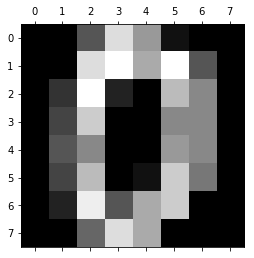

In [6]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [9]:
for i in range(5, 50, 5):
    print(f'Количество компонентов: {i}')
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
    svd.explained_variance_ratio_.sum()

    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    print('Оценка модели:', rf_reduced.oob_score_)
    print()

Количество компонентов: 5
Оценка модели: 0.7957707289927657

Количество компонентов: 10
Оценка модели: 0.8631051752921536

Количество компонентов: 15
Оценка модели: 0.864218141346689

Количество компонентов: 20
Оценка модели: 0.8597662771285476

Количество компонентов: 25
Оценка модели: 0.85920979410128

Количество компонентов: 30
Оценка модели: 0.8414023372287145

Количество компонентов: 35
Оценка модели: 0.8196994991652755

Количество компонентов: 40
Оценка модели: 0.8224819143016138

Количество компонентов: 45
Оценка модели: 0.7846410684474123

